# DeepAR with validation_loss, 50 epochs

In this notebook we identify the best/worst preforming seeds when we run DeepAR with validation data. Then we look at the validation loss to see if we can spot bad seeds during training.

### Load metrics so we can find the best and worst seeds

In [1]:
import os
import re

import matplotlib.pyplot as plt
import numpy as np
from tensorboard.backend.event_processing import event_accumulator

from src.metrics import *

In [2]:
experiment_path = "/home/dev/deepts/experiments/deep_ar/electricity/7B"
exp = load_data(experiment_path)

len(exp)

100

In [3]:
exp[0].head()

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
index,,,,,,,,,,,,,,,,,
0,0.0,94.118958,166.787125,264.0,11.000000,8.026991,0.865762,1.513744,0.638621,NaN,20.169180,113.632220,0.625000,166.787121,0.791667,104.426955,0.875000
1,1.0,10.790873,56.894882,2351.0,97.958333,9.571517,0.247674,0.023779,0.023482,NaN,2.547113,52.167979,0.000000,56.894882,0.583333,64.854755,1.000000
2,2.0,0.260312,6.595274,192.0,8.000000,8.663515,0.031720,0.031269,0.032103,NaN,0.420830,6.977494,0.000000,6.595274,0.375000,7.024054,0.958333
3,3.0,1048.964355,566.118042,10260.0,427.500000,48.394032,0.487421,0.053698,0.054920,NaN,3.926066,262.131342,0.000000,566.118042,0.333333,264.196899,0.791667
4,4.0,727.845052,516.071350,4347.0,181.125000,25.376830,0.847347,0.117765,0.127661,NaN,12.766179,184.705679,0.041667,516.071365,0.083333,343.435884,0.625000


In [4]:
metric = ["MAPE"]

In [5]:
exp_array = calculate_timeseries_means(exp, metric, 321)
exp_array.shape

(100, 321, 1)

In [6]:
exp[0].head(10)

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
index,,,,,,,,,,,,,,,,,
0,0.0,94.118958,166.787125,264.0,11.000000,8.026991,0.865762,1.513744,0.638621,NaN,20.169180,113.632220,0.625000,166.787121,0.791667,104.426955,0.875000
321,0.0,151.599620,221.464050,284.0,11.833333,8.025109,1.149850,1.606017,0.645339,NaN,29.501767,204.198622,0.583333,221.464054,0.916667,107.262907,0.916667
642,0.0,105.123657,194.701447,189.0,7.875000,8.024132,1.011020,2.171595,0.771680,NaN,27.231068,233.551813,0.875000,194.701447,0.916667,52.975967,1.000000
963,0.0,17.494686,70.464882,166.0,6.916667,8.019890,0.366094,0.668091,0.452488,NaN,9.480391,39.407865,0.250000,70.464884,0.416667,61.086189,0.583333
1284,0.0,13.085116,64.074501,154.0,6.416667,8.016509,0.333034,0.563556,0.574662,NaN,7.646473,23.026545,0.083333,64.074502,0.208333,61.976449,0.541667
1605,0.0,18.843760,58.062141,207.0,8.625000,8.010442,0.302013,0.430954,0.315485,NaN,4.750053,28.357173,0.125000,58.062142,0.333333,34.561523,0.791667
1,1.0,10.790873,56.894882,2351.0,97.958333,9.571517,0.247674,0.023779,0.023482,NaN,2.547113,52.167979,0.000000,56.894882,0.583333,64.854755,1.000000
322,1.0,37.543432,123.215454,2427.0,101.125000,9.567923,0.536582,0.050012,0.051771,NaN,2.989088,75.200118,0.000000,123.215454,0.041667,38.126190,0.916667
643,1.0,133.183848,211.097198,2526.0,105.250000,9.561208,0.919938,0.080366,0.085438,NaN,10.133001,94.089639,0.000000,211.097198,0.166667,107.296652,0.708333


### The top 10 best and worst scoring seeds

In [7]:
n = 10

(array([  1.,   1.,  15.,  73.,   0.,   0.,   1.,   0.,  23.,   3.,   3.,
          1.,   0.,   0.,   1.,   3.,  71.,   1., 145., 288.,   7., 107.,
         13.,   2.,   0.,   8.,   2.,   1.,  10.,   3.,   2.,   3.,   1.,
          1.,   1.,   5.,  12.,   0.,   2.,   1.,   3.,   1.,   1.,  27.,
         19.,   1.,   3.,   1.,   1.,   0.,   3.,   6.,   4.,   2.,   5.,
          7.,   0.,  16.,   2.,   0.,  10.,   0.,   0.,   0., 212., 192.,
        268., 165.,   0.,   5., 230.,   1., 149.,   0.,  23.,   0.,   1.,
          0.,  10.,  29., 253.,   4.,  17.,   2., 278.,  54., 103.,  28.,
          2.,   0.,   0.,   0.,   3.,   1.,  61.,   3.,   0.,   1., 189.,
          3.]),
 array([19, 84, 66, 80, 70, 64, 65, 98, 67, 72]),
 array([288., 278., 268., 253., 230., 212., 192., 189., 165., 149.]))

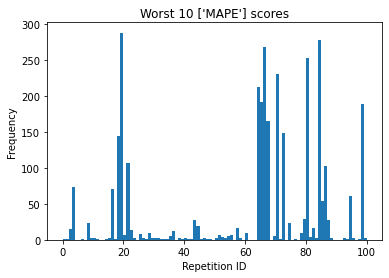

In [8]:
indexes_worst10, worst10 = np.unique(np.argsort(exp_array, axis=0)[-n:], return_counts=True)
worst_10_count = count_repetitions_among_top_n(indexes_worst10, worst10, 100)
plt.title(f"Worst 10 {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(100)], bins=100, range=(0, 100), weights=worst_10_count)

worst_10_count, np.argsort(worst_10_count)[-10:][::-1], worst_10_count[np.argsort(worst_10_count)[-10:][::-1]]

(array([ 13.,   4.,   1.,   8.,  29.,  15.,   9.,  28.,   7.,  26.,  17.,
          9.,  60.,  95.,  58.,  40.,   9.,  95.,   6.,   2.,  71.,   4.,
         64.,  75.,  92.,  17.,  31.,  17.,  50.,  23.,  48.,  68., 127.,
         33., 101.,   4.,  37., 124.,  21.,  10.,  20.,   4.,  90.,   4.,
         12.,  74.,  66., 110.,  19.,  10.,   6.,  17.,   7.,  51.,  11.,
         10.,   7.,   9.,  35.,  12.,  18.,  17.,  17.,  36.,   6.,   3.,
          2.,   3.,   2.,  10.,   4.,  63.,   6.,  33.,   4.,  29.,  31.,
         67.,  10.,  18.,   7.,  62.,   3.,  33.,   2.,  13.,   7.,   7.,
         71.,  52.,  85., 122.,  24.,  27.,   8.,   9.,  14.,  87.,   5.,
         71.]),
 array([32, 37, 91, 47, 34, 13, 17, 24, 42, 97]),
 array([127., 124., 122., 110., 101.,  95.,  95.,  92.,  90.,  87.]))

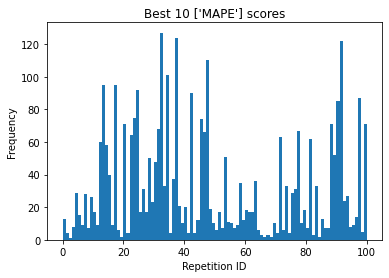

In [9]:
indexes_best10, best10 = np.unique(np.argsort(exp_array, axis=0)[:n], return_counts=True)
best_10_count = count_repetitions_among_top_n(indexes_best10, best10, 100)
plt.title(f"Best 10 {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(100)], bins=100, range=(0, 100), weights=best_10_count)

best_10_count, np.argsort(best_10_count)[-10:][::-1], best_10_count[np.argsort(best_10_count)[-10:][::-1]]

### Read log files

In [10]:
logdir = "/home/dev/deepts/logs/deep_ar/electricity"
folders = os.listdir(logdir)
date1 = "2020-08-27"
date2 = "2020-08-28"

validation_loss = np.empty((100, 50))


for folder in folders:
    if not folder.startswith("seed") or not (folder.endswith(date1) or folder.endswith(date2)):
        continue

    seed_num = int(re.split("(\d+)", folder)[1])

    ea = event_accumulator.EventAccumulator(
        f"{logdir}/{folder}",
        size_guidance={event_accumulator.SCALARS: 0}
    )
    ea.Reload()
    
    for i in range(len(ea.Scalars("validation_loss"))):
        validation_loss[seed_num, i] = ea.Scalars("validation_loss")[i].value

validation_loss, validation_loss.shape


(array([[ 7.33529615,  7.20173264,  6.85569763, ...,  6.36073923,
          6.08701897,  5.97016001],
        [13.50861168,  6.7228179 ,  6.47709417, ...,  5.87521648,
          5.96110916,  5.7144413 ],
        [ 7.17872715,  7.01710653,  6.47811079, ...,  5.8427887 ,
          5.69839001,  5.86053848],
        ...,
        [ 7.02343464,  8.21784782,  6.63644457, ...,  5.49188852,
          7.05139446,  5.89459848],
        [ 7.39551687,  7.22087479,  7.50880337, ...,  5.63214684,
          5.69644785,  6.19645452],
        [ 7.01063919,  7.31733751,  6.49451876, ...,  5.84734535,
          6.37383127,  5.88606024]]),
 (100, 50))

In [20]:
num_plots = 10

### Plot of the worst validation losses

Text(0.5, 1.0, 'Validation loss for worst 10 seeds')

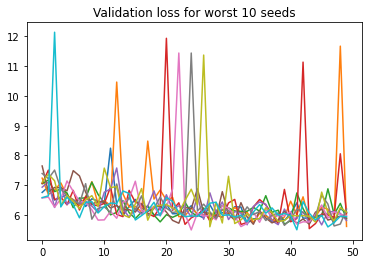

In [22]:
for seed in validation_loss[np.argsort(worst_10_count)[-num_plots:][::-1]]:
    plt.plot(seed)

plt.title(f"Validation loss for worst {num_plots} seeds")

### Plot of best validation losses

Text(0.5, 1.0, 'Validation loss for best 10 seeds')

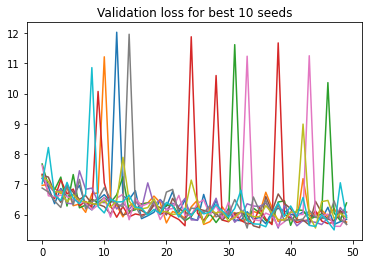

In [23]:
for seed in validation_loss[np.argsort(best_10_count)[-num_plots:][::-1]]:
    plt.plot(seed)

plt.title(f"Validation loss for best {num_plots} seeds")

### Mean of best validation losses and mean of worst validation losses

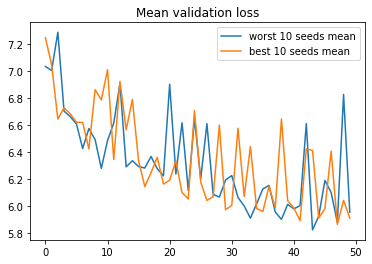

In [24]:
worst_val_loss = validation_loss[np.argsort(worst_10_count)[-num_plots:][::-1]]
best_val_loss = validation_loss[np.argsort(best_10_count)[-num_plots:][::-1]]

plt.plot(worst_val_loss.mean(axis=0), label=f"worst {num_plots} seeds mean")
plt.plot(best_val_loss.mean(axis=0), label=f"best {num_plots} seeds mean")
plt.title("Mean validation loss")
plt.legend()


### Increasing the number of plots to 20

In [25]:
num_plots = 20

Text(0.5, 1.0, 'Validation loss for worst 20 seeds')

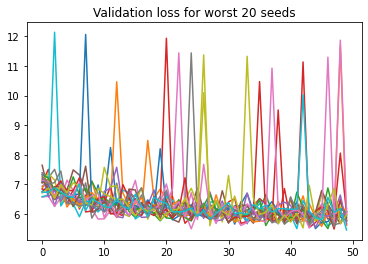

In [26]:
for seed in validation_loss[np.argsort(worst_10_count)[-num_plots:][::-1]]:
    plt.plot(seed)

plt.title(f"Validation loss for worst {num_plots} seeds")

Text(0.5, 1.0, 'Validation loss for best 20 seeds')

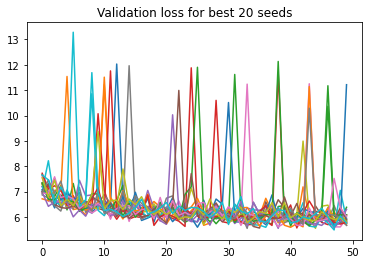

In [27]:
for seed in validation_loss[np.argsort(best_10_count)[-num_plots:][::-1]]:
    plt.plot(seed)

plt.title(f"Validation loss for best {num_plots} seeds")

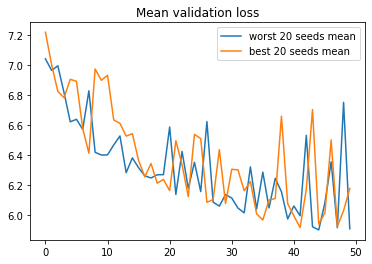

In [28]:
worst_val_loss = validation_loss[np.argsort(worst_10_count)[-num_plots:][::-1]]
best_val_loss = validation_loss[np.argsort(best_10_count)[-num_plots:][::-1]]

plt.plot(worst_val_loss.mean(axis=0), label=f"worst {num_plots} seeds mean")
plt.plot(best_val_loss.mean(axis=0), label=f"best {num_plots} seeds mean")

plt.title("Mean validation loss")
plt.legend()

### Does the two means approach eachother when we increase the number seeds we look at?

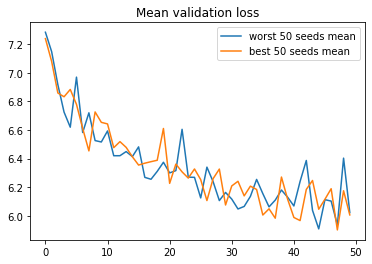

In [29]:
num_plots = 50

worst_val_loss = validation_loss[np.argsort(worst_10_count)[-num_plots:][::-1]]
best_val_loss = validation_loss[np.argsort(best_10_count)[-num_plots:][::-1]]

plt.plot(worst_val_loss.mean(axis=0), label=f"worst {num_plots} seeds mean")
plt.plot(best_val_loss.mean(axis=0), label=f"best {num_plots} seeds mean")
plt.title("Mean validation loss")
plt.legend()

Running for 50 epochs produces similar results to running 20 epochs. The validation loss of the best and worst seeds crosses often, and it looks like stopping the experiment a few epochs earlier or later could potentially produce very different results.